In [9]:
import numpy as np
from Photometric_Stereo import photometric_stereo
import iamge_operations
from PIL import Image
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import open3d as o3d

In [7]:
light_path='untreated_data\light.txt'
target_images_path='untreated_data\cat\cat.txt'
nvector_jpg_path='reasult\\normal_vactor_cat.jpg'
depth_jpg_path='reasult\depth_cat.jpg'
nvector_npy_path='reasult\\normal_vactor_cat'
depth_npy_path='reasult\depth_cat'
obj_path='reasult\cat.obj'


In [2]:
light_information=np.loadtxt(light_path,delimiter=',')
images,mask_image=iamge_operations.load_all_images(target_images_path)

加载数据成功


In [3]:
data=photometric_stereo(images,mask_image,light_information)
data.normal_vectors_computation()

d:\大三上课程\计算机视觉\project2\Photometric_Stereo_3D_Reconstruction_Application\Photometric_Stereo.py:45: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  normal_vector, _, _, _ = np.linalg.lstsq(L, I)#最小二乘法计算法向量


法向量计算完成


In [4]:
data.depth_computation()

深度信息计算完成


In [5]:
iamge_operations.image_save(data.normal_vectors_matrix,nvector_jpg_path)
iamge_operations.image_save(data.depth_matrix, depth_jpg_path)
np.save(nvector_npy_path,data.normal_vectors_matrix)
np.save(depth_npy_path, data.depth_matrix)

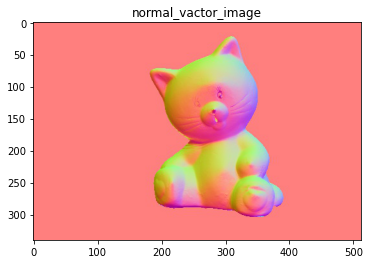

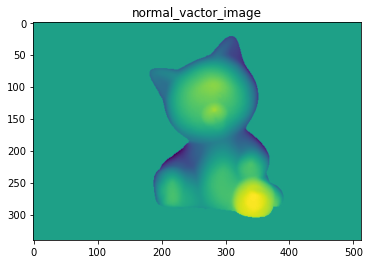

In [6]:
#显示法向量图
plt.figure(1)
plt.imshow(Image.open(nvector_jpg_path))
plt.title("normal_vactor_image")
plt.show()
#显示深度信息图
plt.figure(2)
plt.imshow(Image.open(depth_npy_path))
plt.title("normal_vactor_image")
plt.show()

In [9]:
data.depth_matrix.shape

(340, 512)

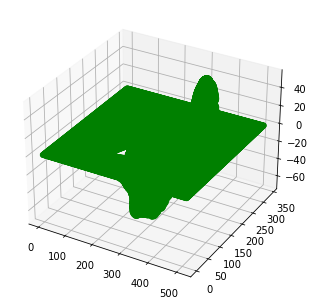

In [30]:
#使用matploylib可视化这些点
x=np.linspace(1,512,512,dtype=int)
y=np.linspace(1,340,340,dtype=int)
X,Y=np.meshgrid(x,y)#生成网格
fig=plt.figure()
ax=mpl_toolkits.mplot3d.Axes3D(fig)
#ax.view_init(45, 90)
ax.scatter(X,Y,data.depth_matrix,alpha=0.5,color='g',)

In [3]:
#使用npy深度数据生成的点云图见reasult文件夹
depth=np.load(depth_npy_path)
h,w=depth.shape
with open(obj_path, 'w') as file:
    for i in range(h):
        for j in range(w):
            if depth[i,j] > 0:
                seq='v'+' '+str(float(i))+' '+str(float(j))+' '+str(depth[i, j])+'\n'
                file.writelines(seq)